<a href="https://colab.research.google.com/github/disha-ramchandani/P2P-loans/blob/main/FINAL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('Final_project_dataset')

In [ ]:
df.head(6)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [ ]:
df.shape

(32416, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32416 entries, 0 to 32415
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  32416 non-null  int64  
 1   person_age                  32416 non-null  float64
 2   person_income               32416 non-null  float64
 3   person_home_ownership       32416 non-null  object 
 4   person_emp_length           32416 non-null  float64
 5   loan_intent                 32416 non-null  object 
 6   loan_grade                  32416 non-null  object 
 7   loan_amnt                   32416 non-null  int64  
 8   loan_int_rate               32416 non-null  float64
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,32416.0,16270.898476,9417.657932,0.00,8103.75,16226.50,24433.25,32580.00
person_age,32416.0,27.451922,5.274139,20.00,23.00,26.00,30.00,40.50
person_income,32416.0,62437.029831,31807.394422,4000.00,38542.00,55000.00,79218.00,140232.00
person_emp_length,32416.0,4.682718,3.719366,0.00,2.00,4.00,7.00,14.50
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,32416.0,11.014662,3.083050,5.42,8.49,10.99,13.11,23.22
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.0,5.712441,3.713420,2.00,3.00,4.00,8.00,15.50


In [ ]:
df.isnull().sum()

Unnamed: 0                    0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)

In [ ]:
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]

In [ ]:
likely_to_have_outlier = ["person_age","person_income","person_emp_length","cb_person_cred_hist_length"]
for col in likely_to_have_outlier:
    print(find_outliers(df, col).shape)

(0, 12)
(0, 12)
(0, 12)
(0, 12)


In [ ]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    df[col] = np.where(df[col]>upper_range, upper_range, df[col])
    df[col] = np.where(df[col]<lower_range, lower_range, df[col])
    return df

In [ ]:
for col in likely_to_have_outlier:
    remove_outliers(df, col)

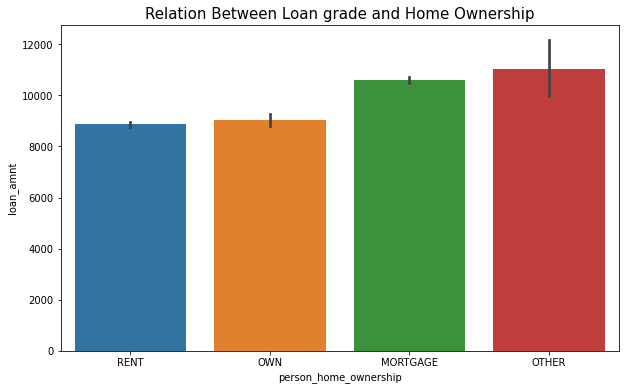

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["person_home_ownership"], y=df["loan_amnt"])
plt.title("Relation Between Loan amount and Home Ownership", size=15)
plt.show()

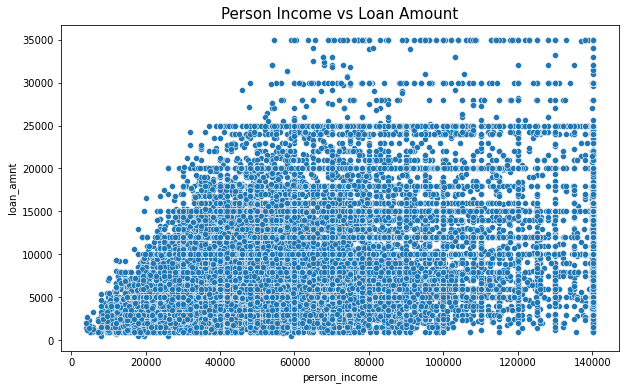

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="person_income", y="loan_amnt", data=df)
plt.title("Person Income vs Loan Amount", size=15)
plt.show()

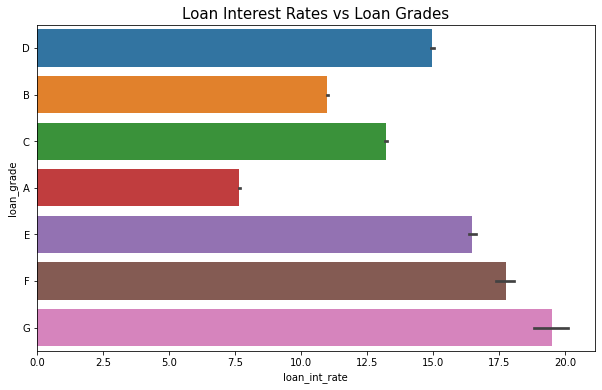

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["loan_int_rate"], y=df["loan_grade"])
plt.title("Loan Interest Rates vs Loan Grades", size=15)
plt.show()

In [ ]:
df.to_csv('Final_project_dataset')